# Stock Market Prediction using LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Accessing data

In [2]:
adani=pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/ADANIPOWER.NS?period1=1646742145&period2=1678278145&interval=1d&events=history&includeAdjustedClose=true')

In [3]:
adani

Date        Open        High         Low       Close   Adj Close  \
0    2022-03-08  118.400002  121.449997  117.349998  118.699997  118.699997   
1    2022-03-09  121.300003  122.699997  119.599998  121.300003  121.300003   
2    2022-03-10  125.000000  125.699997  121.349998  122.500000  122.500000   
3    2022-03-11  122.000000  123.500000  121.099998  121.800003  121.800003   
4    2022-03-14  122.550003  123.099998  120.500000  122.150002  122.150002   
..          ...         ...         ...         ...         ...         ...   
245  2023-03-01  153.000000  153.600006  152.149994  153.600006  153.600006   
246  2023-03-02  161.250000  161.250000  161.250000  161.250000  161.250000   
247  2023-03-03  169.300003  169.300003  169.300003  169.300003  169.300003   
248  2023-03-06  177.750000  177.750000  177.750000  177.750000  177.750000   
249  2023-03-08  183.100006  186.600006  175.100006  186.600006  186.600006   

       Volume  
0    27745685  
1    21234389  
2    20823339  
3    14362421  
4    14143340  
..        ...  
245   1372548  
246   1030431  
247    648028  
248   2877047  
249  19786702  

[250 rows x 7 columns]

In [4]:
# Use 'Close'

data=adani['Close']

In [5]:
data

0      118.699997
1      121.300003
2      122.500000
3      121.800003
4      122.150002
          ...    
245    153.600006
246    161.250000
247    169.300003
248    177.750000
249    186.600006
Name: Close, Length: 250, dtype: float64

## Split into train and test

In [6]:
train=data[:200]
test=data[200:]

In [7]:
train

0      118.699997
1      121.300003
2      122.500000
3      121.800003
4      122.150002
          ...    
195    305.750000
196    290.500000
197    276.000000
198    262.200012
199    275.299988
Name: Close, Length: 200, dtype: float64

In [8]:
test

200    289.049988
201    303.500000
202    304.500000
203    299.549988
204    298.149994
205    294.750000
206    286.600006
207    288.750000
208    283.399994
209    287.700012
210    279.200012
211    276.200012
212    273.649994
213    278.700012
214    272.950012
215    281.950012
216    278.700012
217    277.549988
218    275.049988
219    273.200012
220    274.649994
221    261.000000
222    247.949997
223    235.550003
224    223.800003
225    212.649994
226    202.050003
227    191.949997
228    182.350006
229    173.250000
230    181.899994
231    172.800003
232    164.199997
233    156.000000
234    148.199997
235    140.800003
236    147.800003
237    155.149994
238    162.899994
239    171.000000
240    162.449997
241    154.350006
242    146.649994
243    139.350006
244    146.300003
245    153.600006
246    161.250000
247    169.300003
248    177.750000
249    186.600006
Name: Close, dtype: float64

## Visualisation

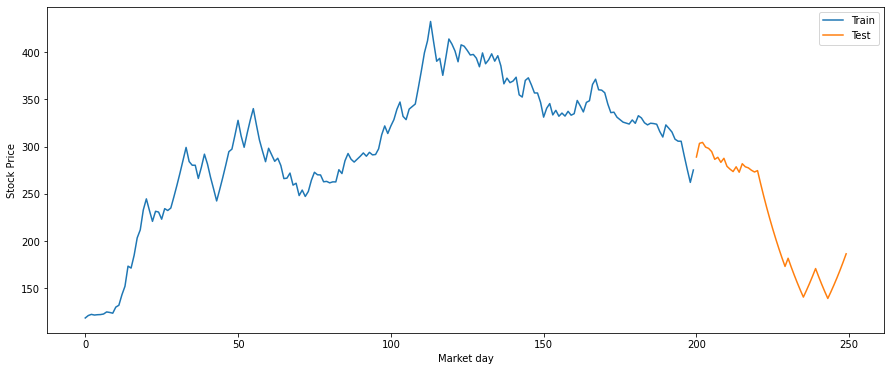

In [9]:
plt.figure(figsize=(15,6))
plt.plot(train)
plt.plot(test)
plt.xlabel('Market day')
plt.ylabel('Stock Price')
plt.legend(['Train','Test']);

## Standardisation 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_scaled=scaler.fit_transform(np.array(train).reshape(-1,1))

test_scaled=scaler.fit_transform(np.array(test).reshape(-1,1))


In [ ]:
train_scaled

array([[0.        ],
       [0.00828555],
       [0.01210963],
       [0.00987892],
       [0.01099428],
       [0.01147229],
       [0.01338434],
       [0.02039516],
       [0.01864247],
       [0.01609306],
       [0.03664755],
       [0.04286169],
       [0.07807521],
       [0.10691524],
       [0.17479288],
       [0.16826005],
       [0.21159977],
       [0.27007648],
       [0.2971638 ],
       [0.36456344],
       [0.40168898],
       [0.36281072],
       [0.32584448],
       [0.35978333],
       [0.35723392],
       [0.333174  ],
       [0.36870617],
       [0.36249203],
       [0.37077758],
       [0.40822181],
       [0.44741876],
       [0.48868703],
       [0.53202675],
       [0.57520718],
       [0.52756533],
       [0.51513705],
       [0.51513705],
       [0.47052265],
       [0.50812618],
       [0.55242189],
       [0.51912048],
       [0.47434668],
       [0.43530913],
       [0.39467815],
       [0.43323772],
       [0.47370939],
       [0.51625243],
       [0.560

## Converting TS data to regression data

Creating training data that uses a sliding window approach.  This is a common technique used to prepare time series data

In time series analysis, it is often useful to model a sequence of observations in order to make predictions about future values. The sliding window approach is a way to create input/output pairs for a supervised learning algorithm from a time series. The idea is to use a window of n consecutive observations as input to the model, and the next observation as the output value that the model is trying to predict.

In the code you provided, the for loop iterates over the range from 10 to 200, and for each iteration it selects a window of 10 consecutive values from the train_scaled time series data array. These 10 values are used as input to the model, and the next value in the time series is used as the output value that the model is trying to predict. This process is repeated for each window in the time series, creating a set of 190 input/output pairs that can be used to train a supervised learning algorithm, such as a neural network, to make predictions on the time series data.

In [ ]:
X_train=[]
y_train=[]
# window_size=10

for i in range(10,200):
  X_train.append(train_scaled[i-10:i,0])
  y_train.append(train_scaled[i])

In [ ]:
X_train

[array([0.        , 0.00828555, 0.01210963, 0.00987892, 0.01099428,
        0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306]),
 array([0.00828555, 0.01210963, 0.00987892, 0.01099428, 0.01147229,
        0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755]),
 array([0.01210963, 0.00987892, 0.01099428, 0.01147229, 0.01338434,
        0.02039516, 0.01864247, 0.01609306, 0.03664755, 0.04286169]),
 array([0.00987892, 0.01099428, 0.01147229, 0.01338434, 0.02039516,
        0.01864247, 0.01609306, 0.03664755, 0.04286169, 0.07807521]),
 array([0.01099428, 0.01147229, 0.01338434, 0.02039516, 0.01864247,
        0.01609306, 0.03664755, 0.04286169, 0.07807521, 0.10691524]),
 array([0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306,
        0.03664755, 0.04286169, 0.07807521, 0.10691524, 0.17479288]),
 array([0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755,
        0.04286169, 0.07807521, 0.10691524, 0.17479288, 0.16826005]),
 array([0.02039516, 0.01864247, 0.

In [ ]:
y_train

[array([0.03664755]),
 array([0.04286169]),
 array([0.07807521]),
 array([0.10691524]),
 array([0.17479288]),
 array([0.16826005]),
 array([0.21159977]),
 array([0.27007648]),
 array([0.2971638]),
 array([0.36456344]),
 array([0.40168898]),
 array([0.36281072]),
 array([0.32584448]),
 array([0.35978333]),
 array([0.35723392]),
 array([0.333174]),
 array([0.36870617]),
 array([0.36249203]),
 array([0.37077758]),
 array([0.40822181]),
 array([0.44741876]),
 array([0.48868703]),
 array([0.53202675]),
 array([0.57520718]),
 array([0.52756533]),
 array([0.51513705]),
 array([0.51513705]),
 array([0.47052265]),
 array([0.50812618]),
 array([0.55242189]),
 array([0.51912048]),
 array([0.47434668]),
 array([0.43530913]),
 array([0.39467815]),
 array([0.43323772]),
 array([0.47370939]),
 array([0.51625243]),
 array([0.56086684]),
 array([0.56947099]),
 array([0.61679414]),
 array([0.66650735]),
 array([0.61440408]),
 array([0.57568517]),
 array([0.62332693]),
 array([0.66730404]),
 array([0.706

In [ ]:
X_train.shape

AttributeError: ignored

In [ ]:
# Converting to np.array

X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
X_train.shape

(190, 10)

In [ ]:
y_train.shape

(190, 1)

In [ ]:
# Converting text data

X_test=[]
y_test=[]
# window_size=10

for i in range(10,50):
  X_test.append(test_scaled[i-10:i,0])
  y_test.append(test_scaled[i])

In [ ]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_test.shape

(40, 10)

In [ ]:
y_test.shape

(40, 1)

## Model building

In [ ]:
lstm=tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(50,return_sequences=True,
                              input_shape=(X_train.shape[1],1))) # (10,1)
lstm.add(tf.keras.layers.Dense(1))

The first layer of the model is an LSTM layer, created using the tf.keras.layers.LSTM() function. It has 50 units, and the return_sequences parameter is set to True, which means that the layer will output a sequence of values instead of a single output value. The input_shape parameter specifies the shape of the input data, which is (X_train.shape[1], 1). This means that the input data is a sequence of X_train.shape[1] values, each of which has a single feature.

The second layer has a single output unit, which will be used to make predictions for the next value in the time series.

In [ ]:
# Compiling

lstm.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mae'])

Epoch 1/100
6/6 [==============================] - 3s 8ms/step - loss: 0.3202 - mae: 0.5375
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1867 - mae: 0.3969
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1040 - mae: 0.2578
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0884 - mae: 0.2418
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0810 - mae: 0.2321
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0675 - mae: 0.1990
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0623 - mae: 0.1827
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0580 - mae: 0.1739
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0531 - mae: 0.1663
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0492 - mae: 0.1614
Epoch 11/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0459 

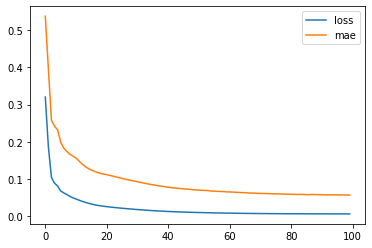

In [ ]:
# Training

tf.random.set_seed(10)
hist=lstm.fit(X_train,y_train,epochs=100)
pd.DataFrame(hist.history).plot();

## Evaluation of the model

In [ ]:
lstm.evaluate(X_test,y_test)

2/2 [==============================] - 1s 10ms/step - loss: 0.0496 - mae: 0.1691


[0.04961086064577103, 0.16910341382026672]

In [ ]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dense (Dense)               (None, 10, 1)             51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# define the model architecture
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1, activation='linear'))

# compile the model with appropriate loss function and metrics
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# train the model on the training data with validation split
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

# evaluate the model on the test data
results = model.evaluate(X_test, y_test)

# make predictions on new data
predictions = model.predict(new_data)


The model has two layers:

The first layer is an LSTM layer, represented by the LSTM type. It has an output shape of (None, 10, 50), which means that the layer outputs a sequence of 10 values, each of which has 50 features. The total number of trainable parameters in this layer is 10,400.
The second layer is a Dense layer, represented by the Dense type. It has an output shape of (None, 10, 1), which means that the layer outputs a sequence of 10 values, each of which has a single feature. The total number of trainable parameters in this layer is 51.
The output shapes of both layers indicate that the model is designed to process input sequences of length 10. The None dimension in the output shapes represents the batch size, which is not specified in the input shape since it can vary.

The summary also indicates that the total number of trainable parameters in the model is 10,451, and all of these parameters are trainable since the model does not have any non-trainable parameters.

In the line lstm (LSTM) (None, 10, 50) 10400, lstm refers to the name of the layer, LSTM refers to the type of layer being used, (None, 10, 50) refers to the shape of the output tensor of this layer, and 10400 refers to the number of trainable parameters in the layer.

The (None, 10, 50) output shape means that the LSTM layer will output a tensor of shape (batch_size, sequence_length, number_of_units) where batch_size is the number of input sequences in a batch (this dimension is None because it can vary depending on the batch size used during training or prediction), sequence_length is the length of the input sequences (in this case, it's 10 because that's the window size used to create the input sequences), and number_of_units is the number of LSTM units in the layer (in this case, it's 50).

The 10400 value represents the number of trainable parameters in the LSTM layer. This value is calculated as follows:

Each LSTM unit has 4 sets of weights (input weights, recurrent weights, bias weights, and peephole weights) and 1 bias term.
The input weights have shape (input_dim, number_of_units), where input_dim is the number of features in the input data (in this case, it's 1 because there's only one feature) and number_of_units is the number of LSTM units in the layer (in this case, it's 50).
The recurrent weights have shape (number_of_units, number_of_units).
The bias weights have shape (number_of_units,).
The peephole weights have shape (number_of_units * 3,).
Therefore, the total number of parameters per unit is (1 * 50) + (50 * 50) + 50 + (50 * 3) = 5,250.
Since there are 50 LSTM units in the layer, the total number of trainable parameters in the layer is 50 * 5,250 = 26,250.
However, since the LSTM layer has 50 units but return_sequences is set to True, the output shape of the layer is (None, 10, 50) instead of (None, 50). Therefore, the number of trainable parameters is reduced to (1 + 50 + 1) * 50 = 10,400.
Note that the number of trainable parameters in a layer depends on the number of units in the layer and the shape of the input data. In this case, the input data has a single feature, so the number of input weights is 1. If the input data had more features, the number of input weights would be higher, which would increase the total number of trainable parameters in the layer.